In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.size

750

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

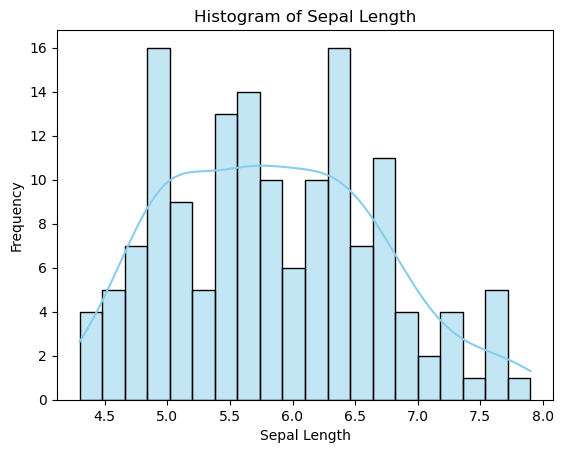

In [10]:
sns.histplot(data = df, x='sepal_length', bins = 20, color ='skyblue',kde=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

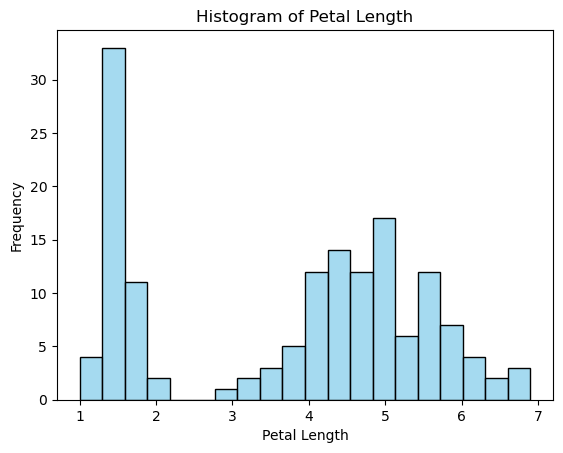

In [11]:
sns.histplot(df['petal_length'], bins = 20, color ='skyblue',edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

<AxesSubplot:>

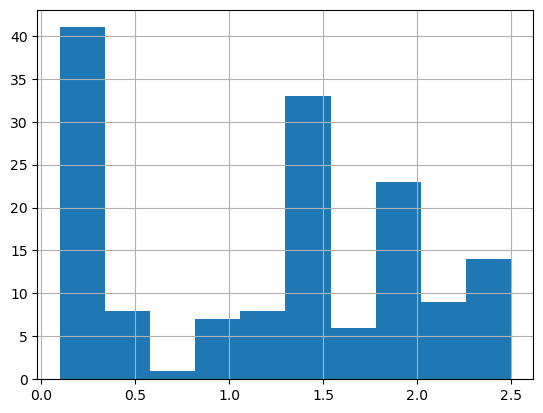

In [12]:
df['petal_width'].hist()

In [13]:
colors = ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica']

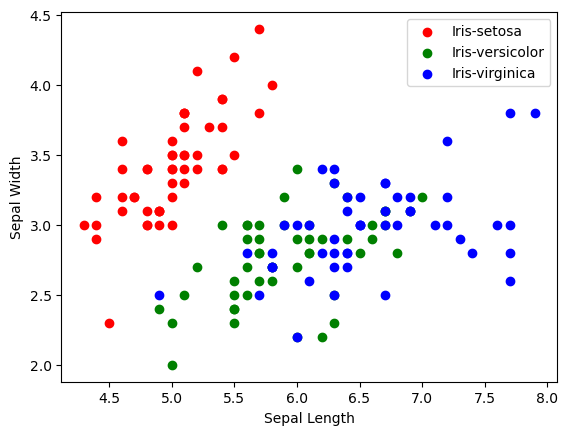

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

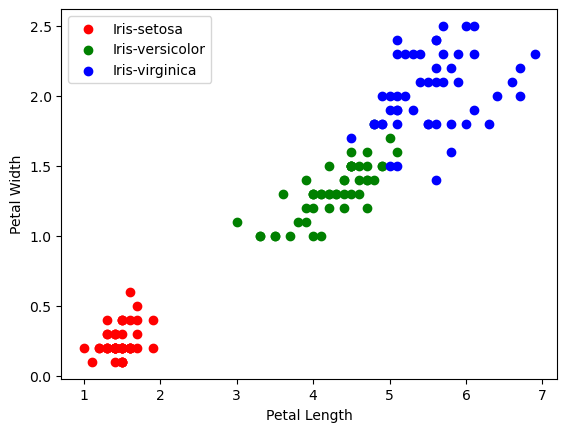

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

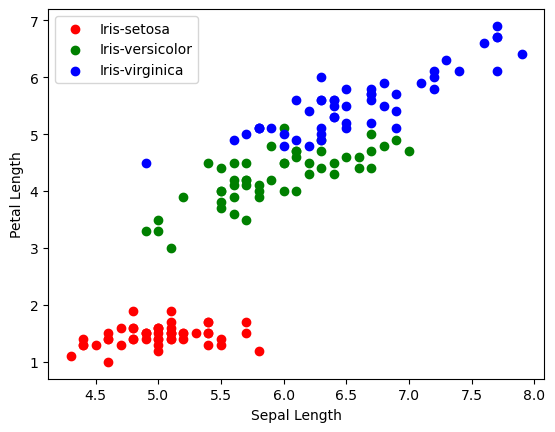

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

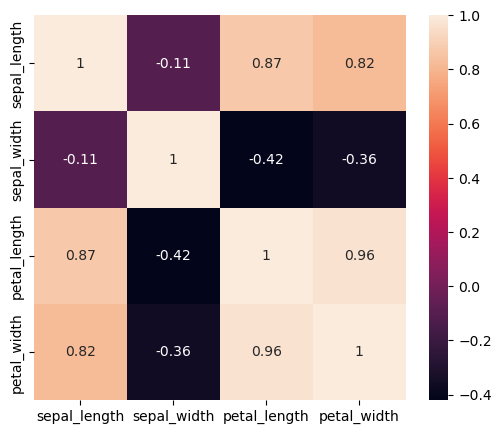

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['species'])
Y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you've already split your data into training and testing sets (x_train, x_test, y_train, y_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Now the model is trained and ready for predictions


LogisticRegression()

In [22]:
print("Accuracy of the model is:", model.score(x_test, y_test) * 100)

Accuracy of the model is: 100.0


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

In [24]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
print("Accuracy of the model is :",model.score(x_test, y_test)*100)

Accuracy of the model is : 100.0
